In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn

In [6]:
#INPUT DATA

data = pd.read_csv('chronic_kidney_disease.csv') 
print(data.head())


    age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                  44                    7800

In [43]:
print(data.shape) #Shape of the data frame

Data.describe()#statistical data

(400, 25)


,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,sodium,potassium,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,313.000000,312.000000,348.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,137.528754,4.627244,12.526437,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,10.408752,3.193904,2.912587,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,135.000000,3.800000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,138.000000,4.400000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,142.000000,4.900000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,163.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data=data.replace('\t','',regex=True) #remove \t from data
data=data.replace('\n','',regex=True) #remove \t from data

Data=data.replace('notckd',0,regex=True) #replace notckd with 0
Data=Data.replace('ckd',1,regex=True)    #replace ckd with 1

Data=Data.replace('abnormal',1,regex=True)    #replace abnormal with 1
Data=Data.replace('normal',0,regex=True)     #replace normal with 0

Data=Data.replace('notpresent',0,regex=True) #replace notpresent with 0
Data=Data.replace('present',1,regex=True)    #replace present with 1

Data=Data.replace('yes',1,regex=True)    #replace yes with 1
Data=Data.replace('no',0,regex=True)     #replace no with 0

Data=Data.replace('good',1,regex=True)    #replace good with 1
Data=Data.replace('poor',0,regex=True)     #replace poor with 0

print(Data.head())

    age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0              NaN   
1   7.0            50.0             1.020      4.0    0.0              NaN   
2  62.0            80.0             1.010      2.0    3.0              0.0   
3  48.0            70.0             1.005      4.0    0.0              0.0   
4  51.0            80.0             1.010      2.0    0.0              0.0   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0       0.0              0.0       0.0                 121.0  ...   
1       0.0              0.0       0.0                   NaN  ...   
2       0.0              0.0       0.0                 423.0  ...   
3       1.0              1.0       0.0                 117.0  ...   
4       0.0              0.0       0.0                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                  44                    7800

In [9]:
Data.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

array([1, 0], dtype=int64)

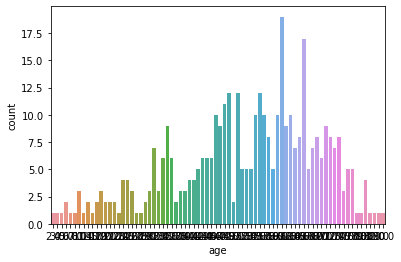

In [10]:
#Age distribution 
sns.countplot(data["age"])

Data["class"].unique()

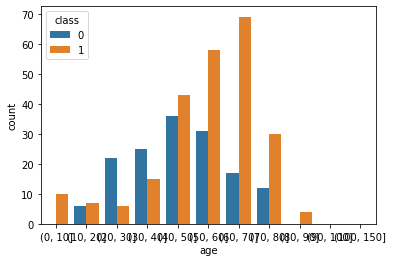

In [11]:
AgeGroup=pd.cut(Data["age"],[0,10,20,30,40,50,60,70,80,90,100,150])
sns.countplot(AgeGroup,hue=Data["class"])

# >From the output, it clearly shows that the data about 0 to 10 AND 80 to 90  ages are 100% about positive ckd
# > from the graph it shows that NONCKD has a good distribution and CKD has a bias towards older people

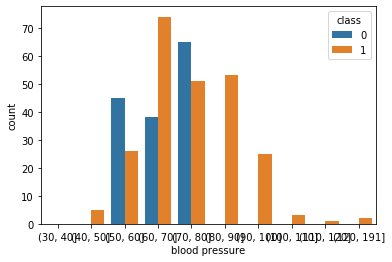

In [12]:
bloodPressureGroup=pd.cut(Data["blood pressure"],[30,40,50,60,70,80,90,100,110,120,191])
sns.countplot(bloodPressureGroup,hue=Data["class"])

#This is a plot of the blood presure and it clearly shows that when the BP is over 80 everyone gets CKD in this data set,
#but in reality there could be other decieses as well which increses the BP level
#and BP less than 50 also have CKD but usualy nonCKD people stays between BP from 50 to 80 but there are CKD people 
#in that range as well


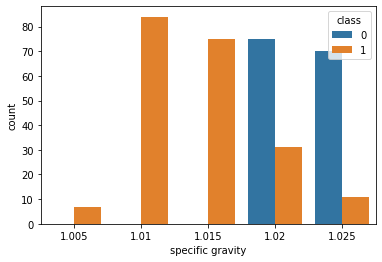

In [13]:
sns.countplot(Data["specific gravity"],hue=Data["class"])
#when consider the specific gravity it shows thats its clear if the SG is lower than 1.02 then thatperson has CKD 
# and if the SG is between 1.02 to 1.025 are the normal range but there are people who has CKD in that range as well but 
# it reduced with the specific gravity 

### sns.countplot(Data["specific gravity"],hue=Data["class"])

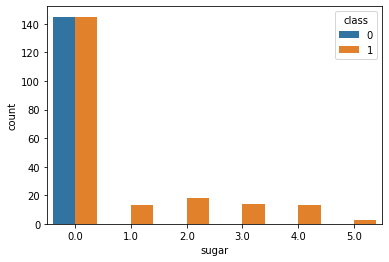

In [36]:
sns.countplot(Data["sugar"],hue=Data["class"])


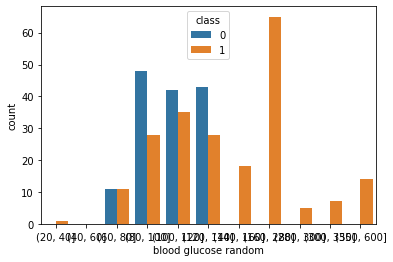

In [18]:
BoodGucoseRandomGroup=pd.cut(Data["blood glucose random"],[20,40,60,80,100,120,140,160,280,300,350,600])
sns.countplot(BoodGucoseRandomGroup,hue=Data["class"])

# the glucose level of the body should be there between 60 and 140 to be a nonCKD bu there are about 30% to 40% who has CKD
# and still maintain the glucose level. 
# but if the glucose level is above 140 its clear that person has CKD

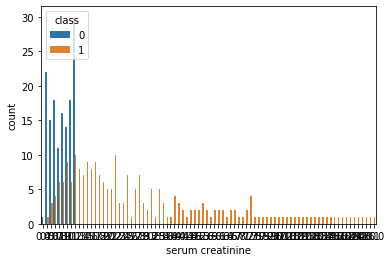

In [20]:
sns.countplot(Data["serum creatinine"],hue=Data["class"])

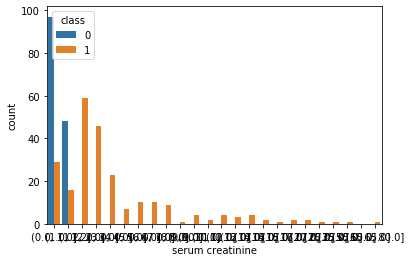

In [40]:
SerumCreatinineGroup=pd.cut(Data["serum creatinine"],[0,1,1.2,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,25,35,50,65,80])
sns.countplot(SerumCreatinineGroup,hue=Data["class"])

#This plot and the above plot clearly shows that CS should be less than 1.2 to be  a non CKD but then again there are people 
# who has CKD with less than 1.2 SC

In [110]:
subdata = Data.loc[:,["class","serum creatinine","blood glucose random","sugar","specific gravity","blood pressure","age"]]
subData=subdata.dropna(subset=["class","serum creatinine","blood glucose random","sugar","specific gravity","blood pressure","age"])


In [215]:
# Training model

def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=0)
    tree.fit(X_train,Y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
    modelx.fit(X_train,Y_train)
    
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
    print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
    print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
    print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    
    
    return  log,knn, svc_lin, svc_rbf, gauss, tree, forest,modelx

In [216]:
p=["blood glucose random","specific gravity","blood pressure","age"]

subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest","XGBClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['blood glucose random', 'specific gravity', 'blood pressure', 'age'] 
size = 302


[0] Logistic Regression Training Accuracy:  0.7717842323651453
[1] K Neighbors Regression Training Accuracy:  0.8547717842323651
[2] SVC Linear Training Accuracy:  0.7634854771784232
[3] SVC RBF Training Accuracy:  0.991701244813278
[4] Gaussian NB Training Accuracy:  0.9377593360995851
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  0.9875518672199171
[7] XGBClassifier Training Accuracy:  0.950207468879668


Logistic Regression Testing Accuracy =  0.7049180327868853 

	TP: 22 	FP: 6 
	TN: 21 	FN: 12



K Neighbors Testing Accuracy =  0.7704918032786885 

	TP: 24 	FP: 4 
	TN: 23 	FN: 10



SVC Linear Testing Accuracy =  0.7540983606557377 

	TP: 22 	FP: 3 
	TN: 24 	FN: 12



SVC RBF Testing Accuracy =  0.6065573770491803 

	TP: 31 	FP: 21 
	TN: 6 	FN: 3



Gaussian NB Testing Accuracy =  0.9180327868852459 

	TP: 29 	FP: 0 
	TN: 27 	FN: 5



Decision Tre

In [217]:
p=["serum creatinine","blood glucose random","specific gravity","blood pressure","age"]

subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]

# Train and test set 60% : 40%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=0)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest","XGBClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['serum creatinine', 'blood glucose random', 'specific gravity', 'blood pressure', 'age'] 
size = 297


[0] Logistic Regression Training Accuracy:  0.898876404494382
[1] K Neighbors Regression Training Accuracy:  0.8651685393258427
[2] SVC Linear Training Accuracy:  0.9213483146067416
[3] SVC RBF Training Accuracy:  0.9943820224719101
[4] Gaussian NB Training Accuracy:  0.9382022471910112
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  0.9943820224719101
[7] XGBClassifier Training Accuracy:  0.9719101123595506


Logistic Regression Testing Accuracy =  0.9243697478991597 

	TP: 54 	FP: 2 
	TN: 56 	FN: 7



K Neighbors Testing Accuracy =  0.8571428571428571 

	TP: 50 	FP: 6 
	TN: 52 	FN: 11



SVC Linear Testing Accuracy =  0.9243697478991597 

	TP: 53 	FP: 1 
	TN: 57 	FN: 8



SVC RBF Testing Accuracy =  0.5714285714285714 

	TP: 61 	FP: 51 
	TN: 7 	FN: 0



Gaussian NB Testing Accuracy =  0.9495798319327731 

	TP: 55 	FP: 0 
	TN: 58 	FN

In [231]:
p=["serum creatinine","blood glucose random","specific gravity","blood pressure","age"]

subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]

# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest","XGBClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['serum creatinine', 'blood glucose random', 'specific gravity', 'blood pressure', 'age'] 
size = 297         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.8985507246376812
[1] K Neighbors Regression Training Accuracy:  0.8405797101449275
[2] SVC Linear Training Accuracy:  0.9082125603864735
[3] SVC RBF Training Accuracy:  0.9951690821256038
[4] Gaussian NB Training Accuracy:  0.9371980676328503
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.966183574879227


Logistic Regression Testing Accuracy =  0.9333333333333333 

	TP: 38 	FP: 1 
	TN: 46 	FN: 5



K Neighbors Testing Accuracy =  0.8333333333333334 

	TP: 35 	FP: 7 
	TN: 40 	FN: 8



SVC Linear Testing Accuracy =  0.9444444444444444 

	TP: 39 	FP: 1 
	TN: 46 	FN: 4



SVC RBF Testing Accuracy =  0.5555555555555556 

	TP: 43 	FP: 40 
	TN: 7 	FN: 0



Gaussian NB Testing Accuracy =  0.9555555555555556 

	TP: 3